# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Syarief Hidayatullah
- **Email:** syarifdayat321@student.uns.ac.id
- **ID Dicoding:** syahid77

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan dan perubahan antara pengguna Bike Sharing pada tahun 2011 dan 2012 untuk setiap bulannya?
- Bagaimana demografi pengguna Bike Sharing?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

In [39]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel `hour_df`

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

Memperbaiki Tipe Data

In [46]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan Tabel `hour_df`

Memperbaiki Tipe Data

In [17]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [38]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [20]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
590,591,2012-08-13,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883
176,177,2011-06-26,3,0,6,0,0,0,1,0.680000,0.637629,0.513333,0.094533,1920,3385,5305
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536
384,385,2012-01-20,1,1,1,0,5,1,2,0.217500,0.220958,0.450000,0.202750,115,3048,3163
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087


In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
day_df.instant.is_unique

True

In [24]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [33]:
day_df.groupby(by="weathersit").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual       registered        cnt      
              min   max        min   max  min   max
weathersit                                         
1              15  3410        416  6946  431  8714
2               9  3155        491  6844  605  8362
3               2  1264         20  4324   22  4639

In [40]:
day_df.groupby(by=["weekday", "year"]).cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

In [42]:
# Filter data for the year 2011
day_df_2011 = day_df[day_df['yr'] == 0]

# Perform groupby operation on 'weekday' and sum up 'cnt' column
grouped_data = day_df_2011.groupby('weekday')['cnt'].sum()

# Sort the values in descending order
sorted_data = grouped_data.sort_values(ascending=False)

print(sorted_data)

weekday
5    182006
2    180338
1    180221
6    179743
0    177074
4    174552
3    169169
Name: cnt, dtype: int64


### Explore `hour_df`

In [25]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11323,11324,2012-04-22,2,1,4,0,0,0,0,2,0.46,0.4545,0.82,0.1940,32,85,117
3088,3089,2011-05-13,2,0,5,14,0,5,1,2,0.52,0.5000,0.87,0.2836,70,120,190
2491,2492,2011-04-18,2,0,4,17,0,1,1,1,0.58,0.5455,0.49,0.2836,66,362,428
16537,16538,2012-11-26,4,1,11,19,0,1,1,1,0.34,0.3636,0.53,0.0000,16,355,371
13006,13007,2012-07-01,3,1,7,3,0,0,0,1,0.72,0.7121,0.84,0.1343,6,27,33


In [26]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [27]:
hour_df.instant.is_unique

True

In [29]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [37]:
hour_df.groupby(by="weathersit").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual      registered      cnt     
              min  max        min  max min  max
weathersit                                     
1               0  367          0  886   1  977
2               0  350          0  822   1  957
3               0  263          0  791   1  891
4               1    6         22  158  23  164

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan antara pengguna Bike Sharing pada tahun 2011 dan 2012 untuk setiap bulannya?

In [44]:
monthly_df = day_df.groupby(['yr', 'mnth']).agg({
    "cnt" : ['min', 'max', 'mean', "sum"]
})

total_monthly

cnt                           
          min   max         mean     sum
yr mnth                                 
0  1      431  1985  1231.903226   38189
   2     1005  2927  1721.964286   48215
   3      605  3239  2065.967742   64045
   4      795  5312  3162.333333   94870
   5     2633  5805  4381.322581  135821
   6     3767  5515  4783.733333  143512
   7     3285  6043  4559.387097  141341
   8     1115  5895  4409.387097  136691
   9     1842  5423  4247.266667  127418
   10     627  5511  3984.225806  123511
   11    1495  4486  3405.566667  102167
   12     705  3940  2816.870968   87323
1  1     1301  4521  3120.774194   96744
   2     1529  5062  3556.448276  103137
   3     3194  8362  5318.548387  164875
   4     1027  7460  5807.466667  174224
   5     2843  8294  6318.225806  195865
   6     4127  8120  6761.000000  202830
   7     4459  8173  6567.967742  203607
   8     4549  7865  6919.451613  214503
   9     4073  8714  7285.766667  218573
   10      22  8156  6414.225806  198841
   11    2277  6852  5088.800000  152664
   12     441  6606  3990.741935  123713

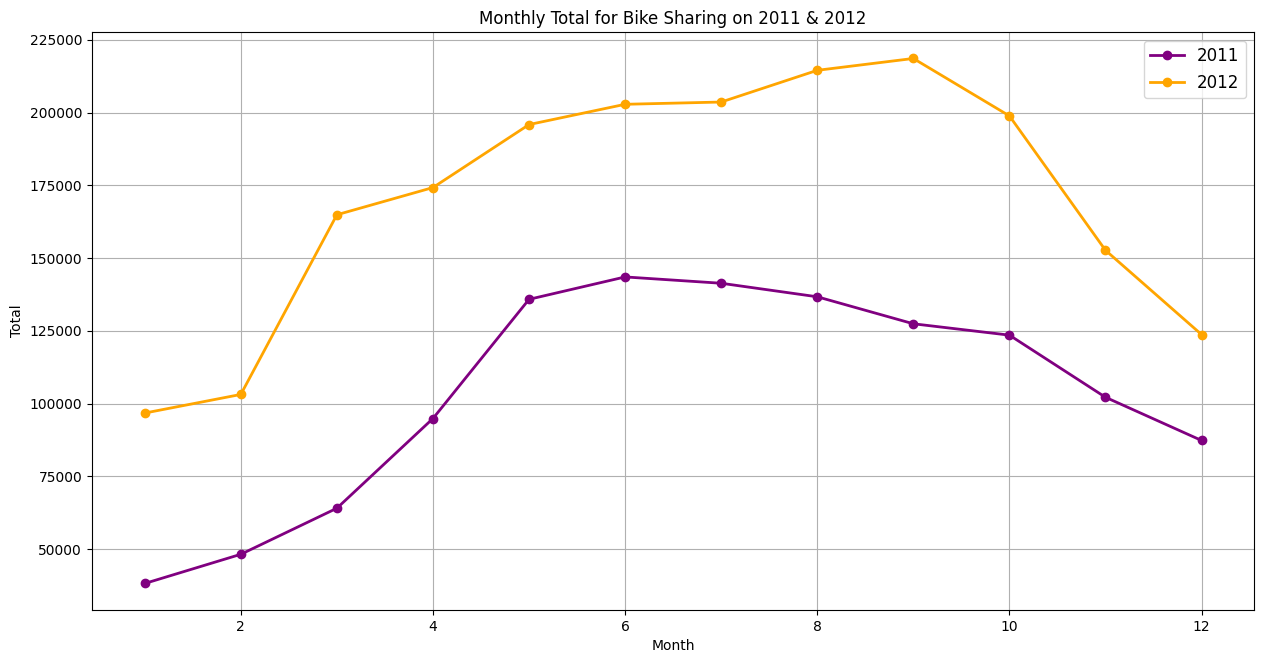

In [8]:
# Filter for 2011
day_df_2011 = day_df[day_df["yr"] == 0]
day_df_2011_group = day_df_2011.groupby(by="mnth").agg({
    "cnt": ["sum"]
}).reset_index()

# Filter for 2012
day_df_2012 = day_df[day_df["yr"] == 1]
day_df_2012_group = day_df_2012.groupby(by="mnth").agg({
    "cnt": ["sum"]
}).reset_index()


plt.figure(figsize=(15, 7.5))

# Plot for 2011
plt.plot(
    day_df_2011_group["mnth"],
    day_df_2011_group["cnt"],
    marker='o', 
    linewidth=2,
    color="purple",
    label = "2011"
)

# Plot for 2012
plt.plot(
    day_df_2012_group["mnth"],
    day_df_2012_group["cnt"],
    marker='o', 
    linewidth=2,
    color="orange",
    label = "2012"
)

plt.xlabel("Month")
plt.ylabel("Total")
plt.title("Monthly Total for Bike Sharing on 2011 & 2012")
plt.grid()
plt.legend(fontsize = "large")
plt.show()

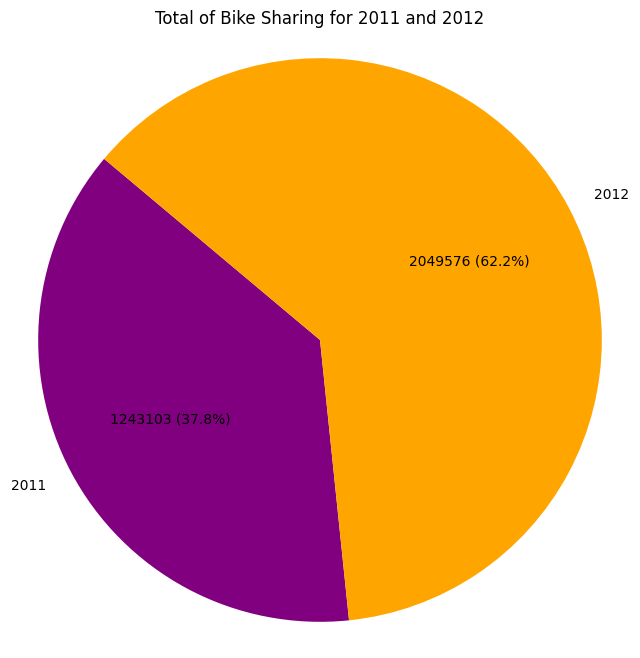

In [9]:
# Total 
total_2011 = day_df_2011_group["cnt"]["sum"].sum()
total_2012 = day_df_2012_group["cnt"]["sum"].sum()

labels = ['2011', '2012']

# Data
sizes = [total_2011, total_2012]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=140, colors=['purple', 'orange'])
plt.title('Total of Bike Sharing for 2011 and 2012')
plt.axis('equal') 
plt.show()

In [10]:
persentase_perubahan = ((total_2012 - total_2011)/total_2011) * 100 
print("Persentase Perubahannya adalah : ", round(persentase_perubahan,2), "%")


Persentase Perubahannya adalah :  64.88 %


### Pertanyaan 2: Bagaimana Demografi Pengguna Bike Sharing dalam 2 tahun (2011 & 2012)?

#### Berdasarkan Musim

In [11]:
byseason_df = day_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "total_rental_bikes"
}, inplace=True)
byseason_df

,season,total_rental_bikes
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


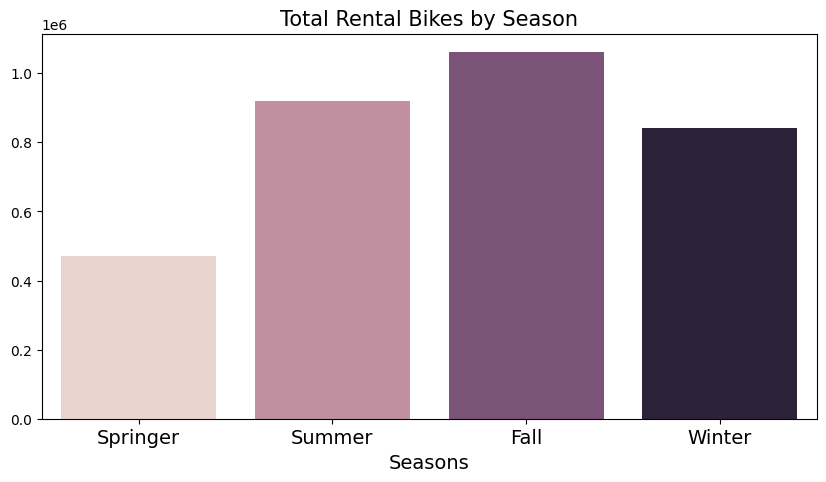

In [14]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_rental_bikes", 
    x="season",
    data=byseason_df.sort_values(by="total_rental_bikes", ascending=False),
    hue="season",  
    legend=False  
)
plt.title("Total Rental Bikes Users by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xlabel("Seasons", fontsize=14) 


custom_labels = ['Springer', 'Summer', 'Fall', 'Winter']  
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=14)  

plt.show()

#### Berdasarkan Weather Situation

In [22]:
byweathersit_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
byweathersit_df.rename(columns={
    "cnt": "total_rental_bikes"
}, inplace=True)
byweathersit_df

,weathersit,total_rental_bikes
0,1,2257952
1,2,996858
2,3,37869


In [28]:
from matplotlib.patches import Patch

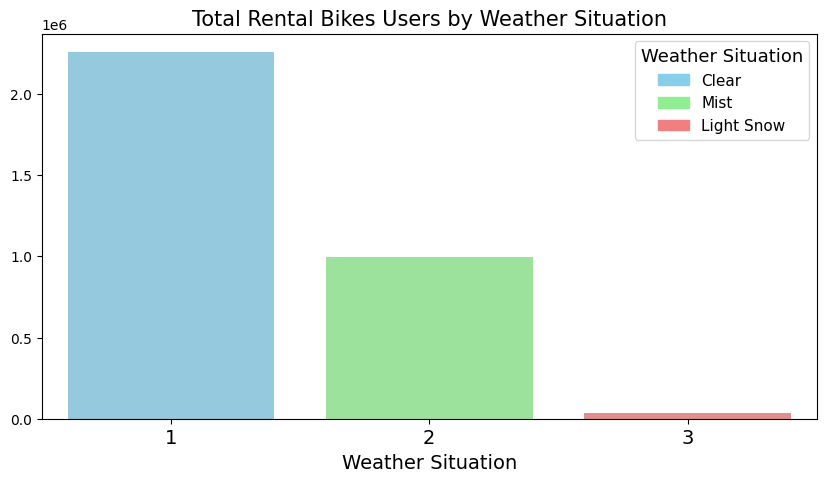

In [36]:
custom_colors = ["skyblue", "lightgreen", "lightcoral"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_rental_bikes", 
    x="weathersit",
    data=byweathersit_df.sort_values(by="total_rental_bikes", ascending=False),
    hue="weathersit", 
    palette=custom_colors, 
    legend=False  
)
plt.title("Total Rental Bikes Users by Weather Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xlabel("Weather Situation", fontsize=14) 


custom_labels = ['1', '2', '3']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=14)  

legend_labels = ['Clear', 'Mist', 'Light Snow']
legend_handles = [Patch(color=color) for color in custom_colors] 
plt.legend(legend_handles, legend_labels, title="Weather Situation", title_fontsize="13", fontsize="11", loc="upper right")

plt.show()

#### Berdasarkan Waktu Holiday

In [34]:
byholiday_df = day_df.groupby(by="holiday").cnt.sum().reset_index()
byholiday_df.rename(columns={
    "cnt": "total_rental_bikes"
}, inplace=True)
byholiday_df

,holiday,total_rental_bikes
0,0,3214244
1,1,78435


#### Berdasarkan Waktu Weekday

In [37]:
byweekday_df = day_df.groupby(by="weekday").cnt.sum().reset_index()
byweekday_df.rename(columns={
    "cnt": "total_rental_bikes"
}, inplace=True)
byweekday_df

,weekday,total_rental_bikes
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


## Conclusion

- Conclution pertanyaan 1 :
Terlihat terjadi peningkatan pengguna Bike Sharing dari tahun 2011 hingga 2012 yang cukup signifikan. Terlihat dari pie chart yang ditampilkan, dari total keseluruhan data terlihat bahwa tahun 2012 memiliki persentase 62,2 % sedangkan tahun 2011 memiliki persentase 37,8%. Kemudian persentase perubahan dari 2011 dan 2012 adalah sebesar 64,88 %.


- Conclution pertanyaan 2
Dari demografi yang ditampilkan, terlihat bahwa :
1. Berdasarkan musim, total pengguna Bike Sharing pada tahun 2011 & 2012 terbesar adalah pada musim gugur (Fall). Urutannya adalah 
    1. Fall
    2. Summer
    3. Winter
    4. Spring

2. Berdasarkan Weather Situation, total pengguna Bike Sharing pada tahun 2011 & 2012 terbesar adalah pada saat Clear. Urutannya adalah
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds